In [12]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, 'analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

# $p_\mu$ from MCS and from range - in data

In [7]:
data = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/2018_08_16/prod_reco_optfilter_bnb_v12_unblind_mcc8_04_2018_08_16_vertices.csv')

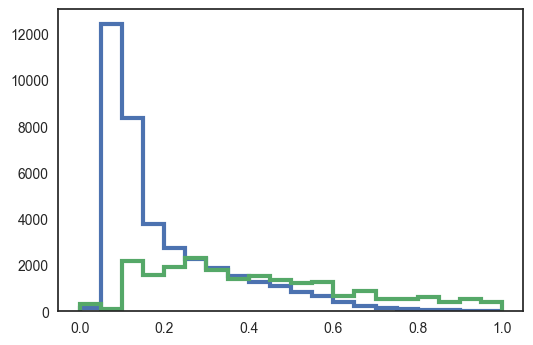

In [11]:
plt.hist(data['reco_Pmu'],bins=linspace(0,1,21),histtype='step',linewidth=3);
plt.hist(data['reco_Pmu_mcs'],bins=linspace(0,1,21),histtype='step',linewidth=3);

# $Q^2$ from MCS
Aug-16, 2018

In [4]:
overlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8.11_vertices.csv')
sam = overlay[overlay['1mu-1p']==True]

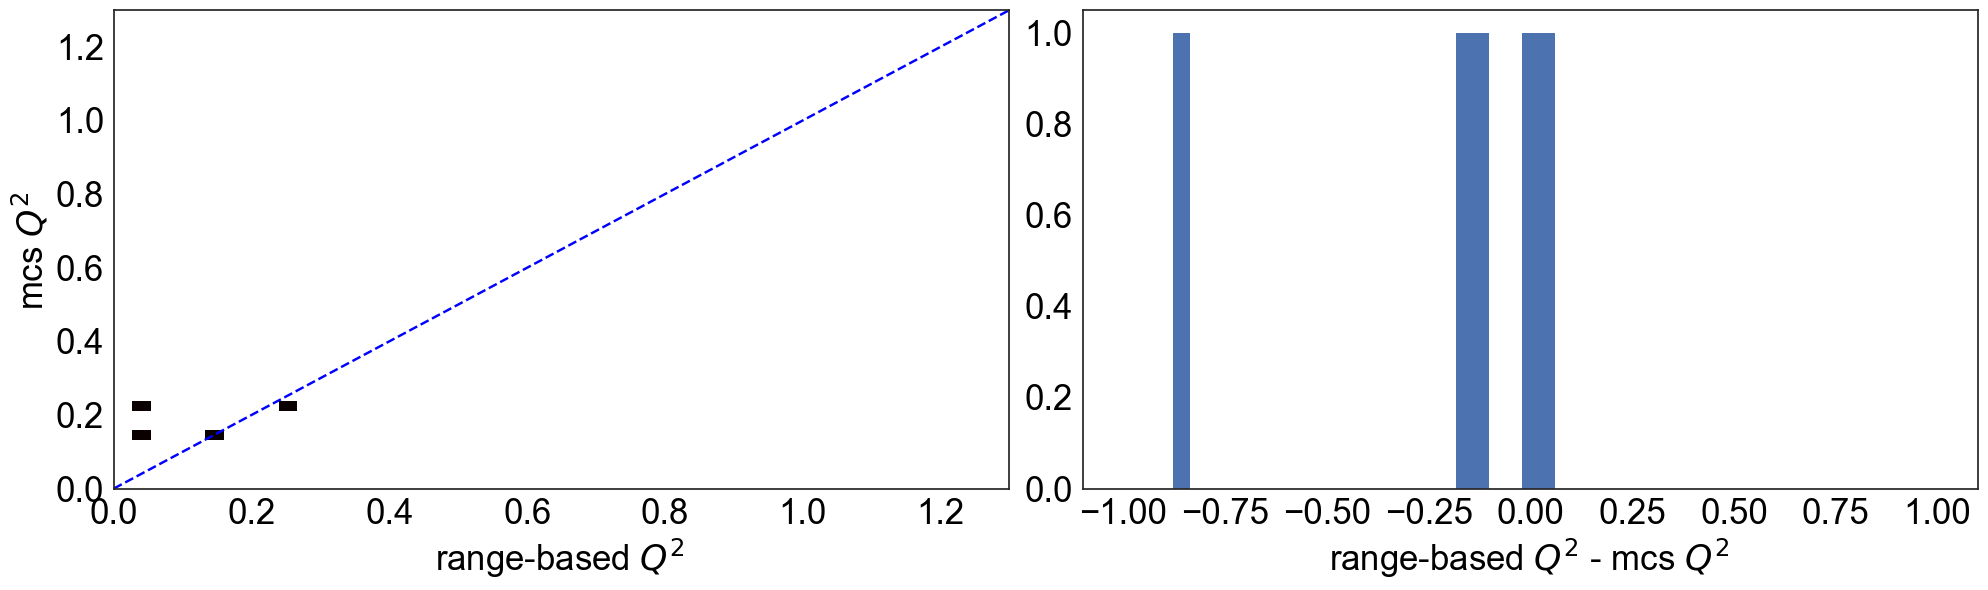

In [5]:
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(1,2,1)
bins=linspace(0.,1.3,50)
plot_2d_hist(sam['reco_Q2'],sam['reco_Q2_mcs'],bins=bins
             ,xlabel=r'range-based $Q^2$ ',ylabel=r'mcs $Q^2$ ',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(1,2,2)
bins=linspace(0.,1.3,50)
plt.hist(sam['reco_Q2']-sam['reco_Q2_mcs'],bins=linspace(-1,1,50));
set_axes(ax,r'range-based $Q^2$ - mcs $Q^2$ ')
plt.tight_layout()

# kinematics

In [22]:

# ------------------------------------------------
# July-24, 2018 (last edit Aug-16,2018)
def load_samples(date='2018_04_28'
                 ,filename='ecohen_physical_files_adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_2018_02_17_vertices'
                 ,only_in_FV=True):
    '''
        return:
                samples: 
                dict() of pairs, pd.DataFrame() of different into pair_types
        '''
    pairs = pd.read_csv(vertices_files_path+'/'+date+'/'+filename+'.csv')
    pairsFV = sample_in_FV(pairs)
    print len(pairs),'ccqe candidate pairs,',len(pairsFV),'in FV'
    samples = dict()
    for pair_type in pair_types:#{
        if only_in_FV: samples[pair_type] = pairsFV[pairsFV[pair_type]==True]
        else: samples[pair_type] = pairs[pairs[pair_type]==True]
        if 'CC 1p' in pair_type: print_line()
        print len(samples[pair_type]),'are '+pair_type+', %.1f'%(100.*float(len(samples[pair_type]))/len(pairsFV))+'%'
    #}
    print "I finished loading overlay samples. We have in total %d pairs"%len(pairs)
    return samples
# ------------------------------------------------



In [23]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices',only_in_FV=False)

285009 ccqe candidate pairs, 187262 in FV
74387 are 1mu-1p, 39.7%
55226 are other pairs, 29.5%
155396 are cosmic, 83.0%
--------------------------------------------------------------
36843 are CC 1p 0pi, 19.7%
--------------------------------------------------------------
40729 are CC 1p, 21.7%
I finished loading overlay samples. We have in total 285009 pairs


In [24]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash'
               ,'length','non-collinearity','vertex activity'
               ,'delta phi','Pt & delta phi']

cutlabels = ['preselection','$dE/dx$ profile',r'$N_{flashes}>0$','optical filter'
             ,'track lengths','non-collinearity','vertex activity'
             ,'coplanarity','$p_t<0.35$ GeV/c']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,CC$1 p$ eff.,CC$1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi,CC 1p
no cut,100.0%,26.1%,100.0%,12.9%,100.0%,14.3%,no cut,100.0% (74387),100.0% (55226),100.0% (155396),100.0% (36843),100.0% (40729)
Chi2Proton,62.0%,73.0%,67.1%,39.2%,66.3%,42.7%,Chi2Proton,62.0% (46155),17.3% (9547),4.8% (7485),67.1% (24739),66.3% (26989)
Nflashes,61.7%,75.2%,66.8%,40.3%,65.9%,44.0%,Nflashes,61.7% (45931),17.2% (9495),3.6% (5664),66.8% (24612),65.9% (26859)
MatchedFlash,47.5%,81.1%,51.5%,43.6%,51.2%,47.8%,MatchedFlash,47.5% (35339),11.2% (6184),1.3% (2050),51.5% (18991),51.2% (20836)
length,43.1%,85.4%,47.3%,46.5%,46.6%,50.6%,length,43.1% (32061),6.8% (3754),1.1% (1707),47.3% (17430),46.6% (18980)
non-collinearity,39.7%,89.2%,45.1%,50.3%,44.2%,54.4%,non-collinearity,39.7% (29505),5.0% (2760),0.5% (795),45.1% (16627),44.2% (17993)
vertex activity,29.2%,90.6%,40.5%,62.3%,38.5%,65.5%,vertex activity,29.2% (21717),3.3% (1802),0.3% (443),40.5% (14922),38.5% (15689)
delta phi,20.2%,96.0%,31.9%,75.2%,29.9%,77.8%,delta phi,20.2% (15005),0.8% (451),0.1% (179),31.9% (11756),29.9% (12159)
Pt & delta phi,17.6%,96.8%,28.5%,77.6%,26.7%,80.3%,Pt & delta phi,17.6% (13113),0.6% (319),0.1% (119),28.5% (10514),26.7% (10877)


# reconstruction of the kinematics

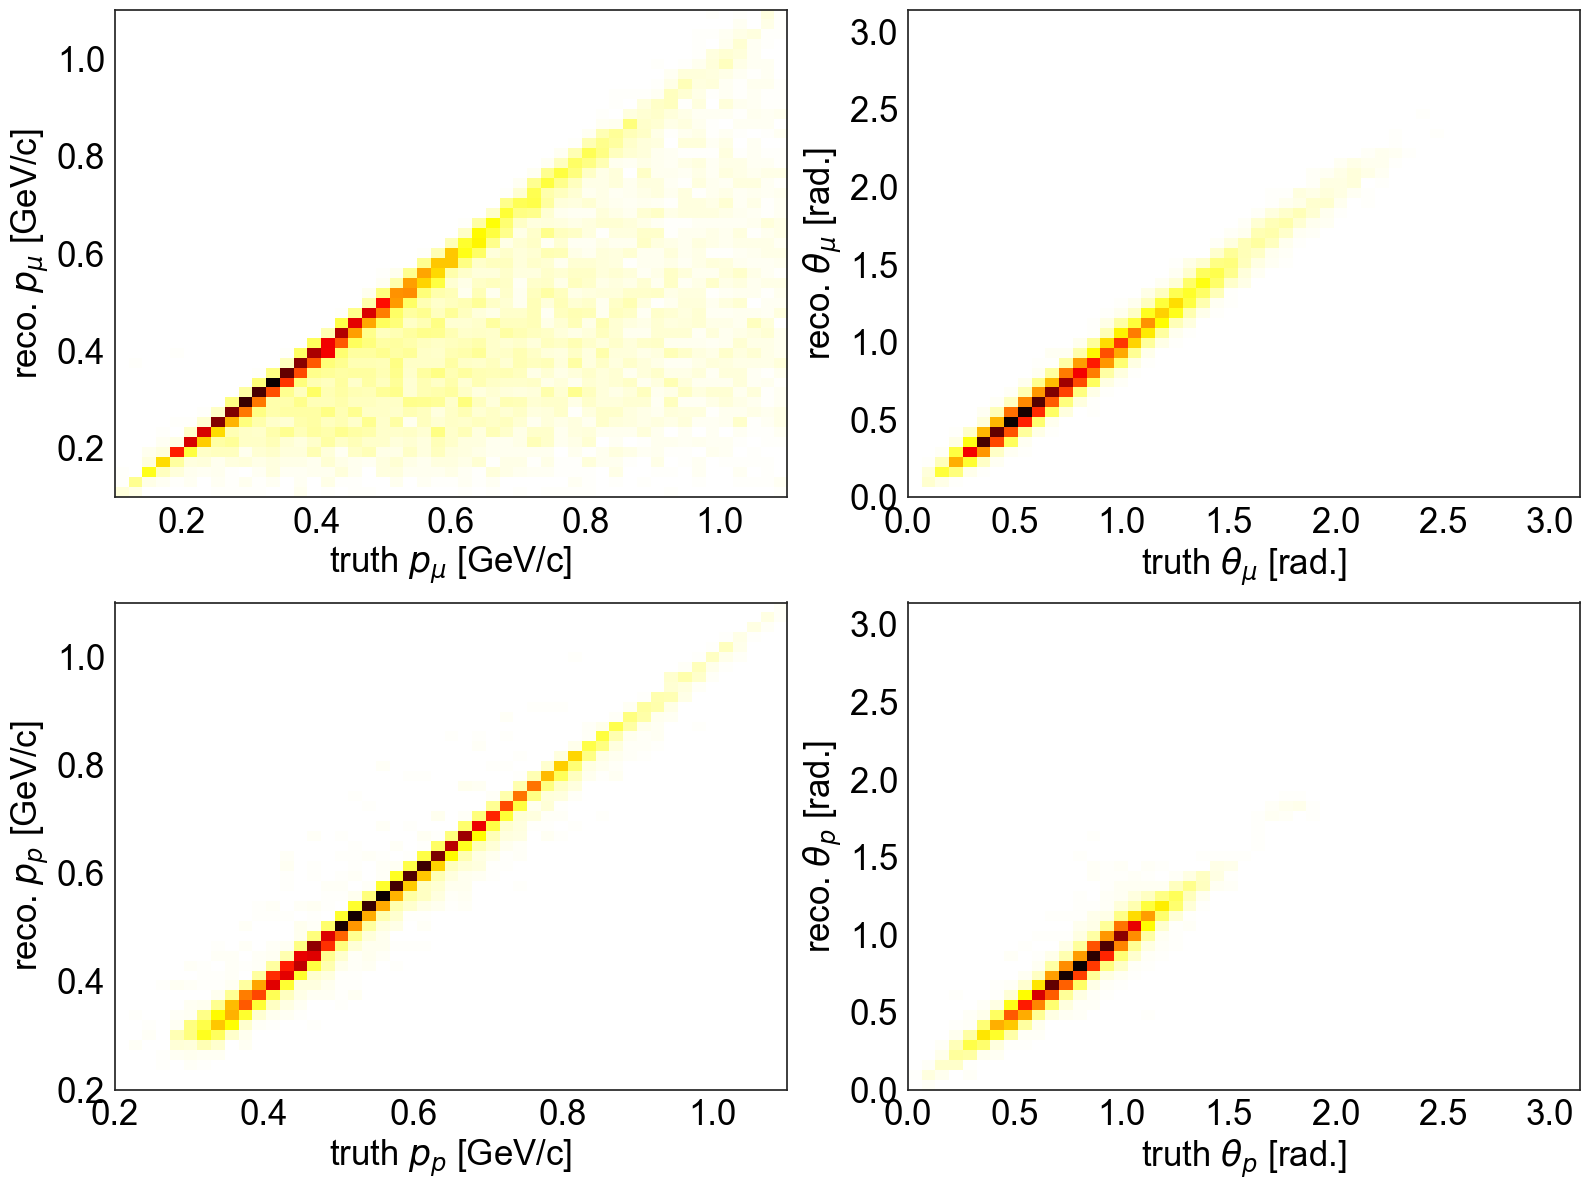

In [25]:
sam = reducedOverlay['Pt & delta phi']['1mu-1p']
fig=plt.figure(figsize=(16,12))
for iax,(var,label,bins) in enumerate(zip(['Pmu','Pmu_theta','Pp','Pp_theta']
                                        ,[r'$p_\mu$ [GeV/c]',r'$\theta_\mu$ [rad.]',r'$p_p$ [GeV/c]',r'$\theta_p$ [rad.]']
                                        ,[linspace(0.1,1.1,50),linspace(0,np.pi,50),linspace(0.2,1.1,50),linspace(0,np.pi,50,50)])):
    ax=fig.add_subplot(2,2,1+iax)        
    plot_2d_hist(sam['truth_'+var],sam['reco_'+var],bins=bins
             ,xlabel=r'truth '+label,ylabel=r'reco. '+label,ax=ax);
plt.tight_layout()

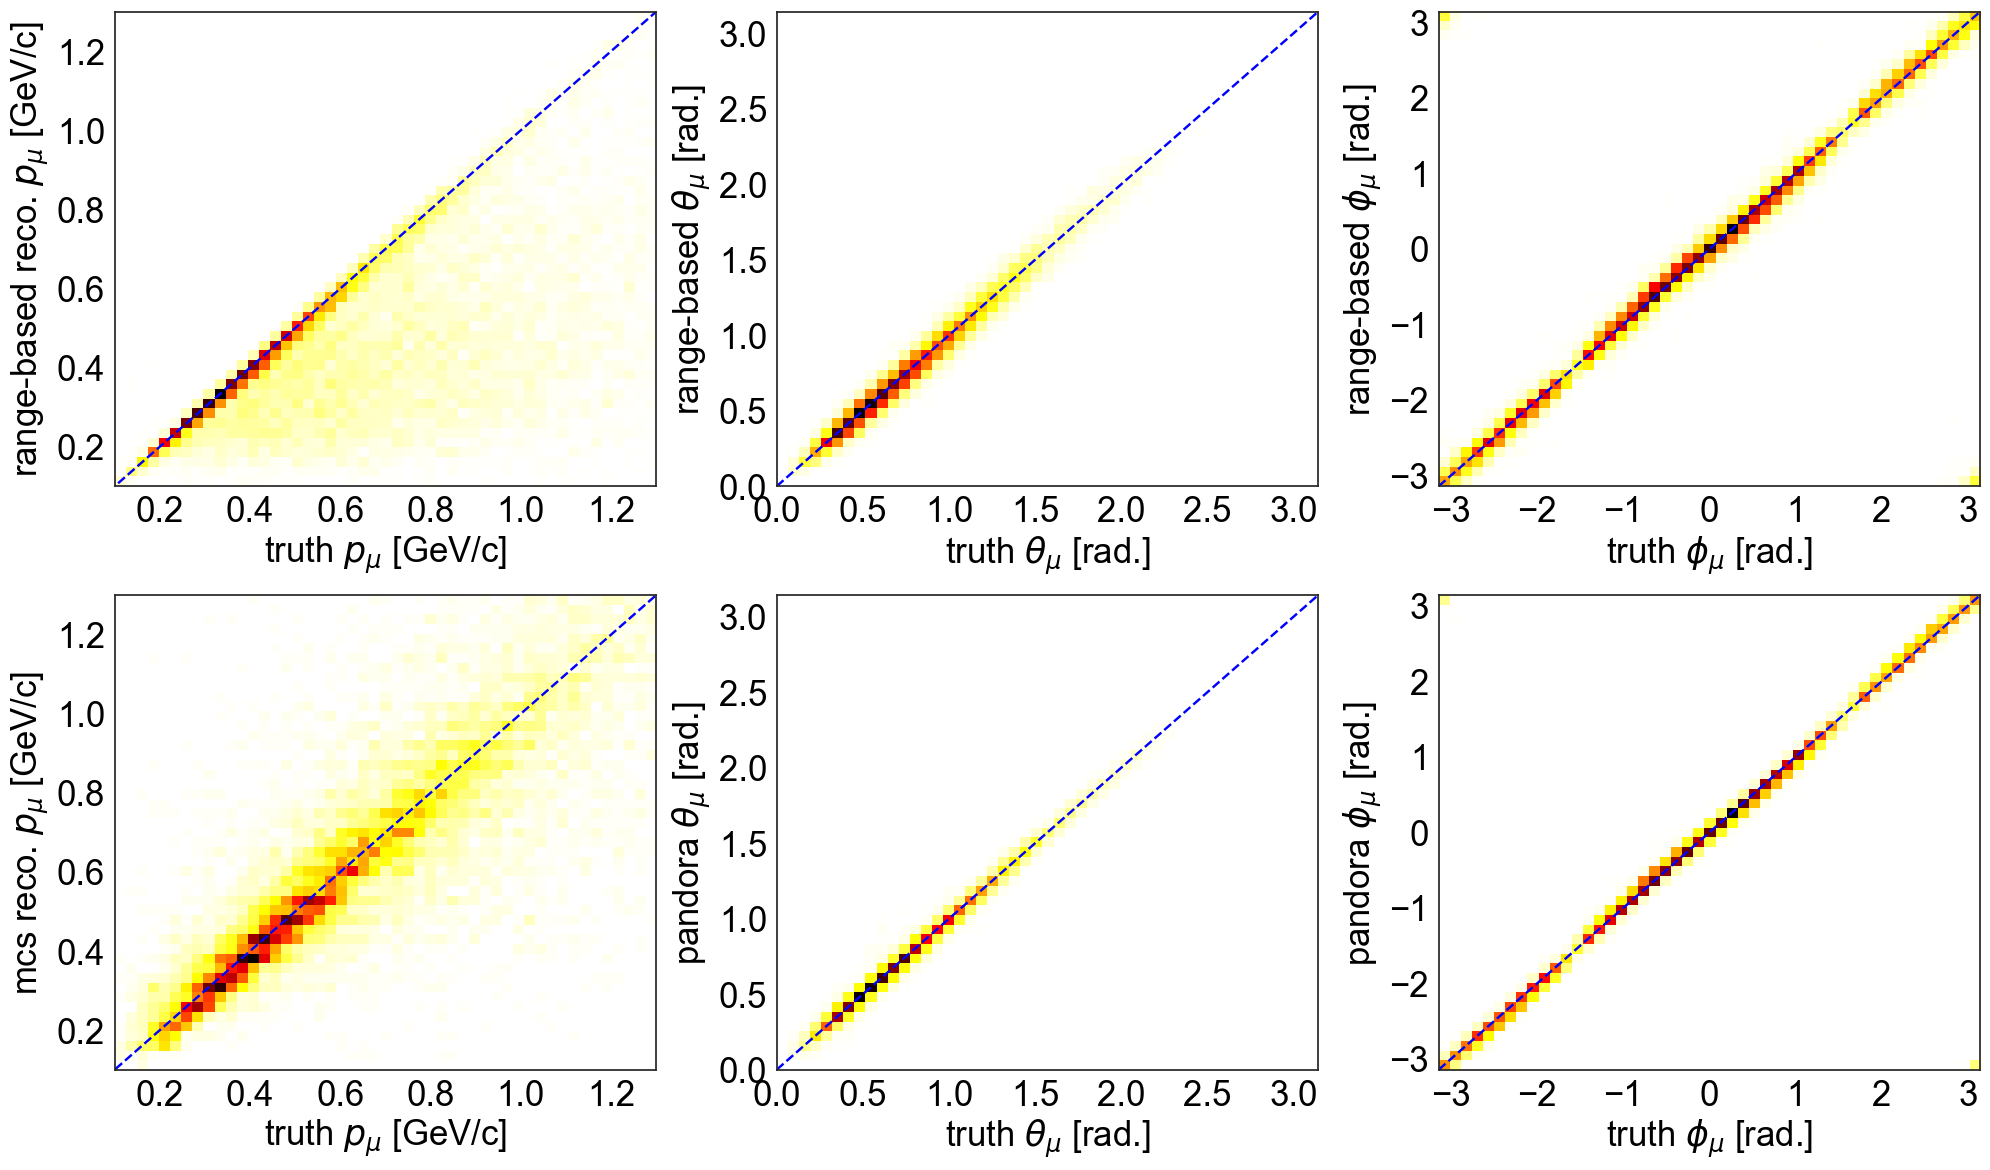

In [26]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,3,1)        
plot_2d_hist(sam['truth_Pmu'],sam['reco_Pmu'],bins=linspace(0.1,1.3,50)
             ,xlabel=r'truth '+r'$p_\mu$ [GeV/c]',ylabel=r'range-based reco. '+r'$p_\mu$ [GeV/c]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,2)
bins=linspace(0,np.pi,50)
plot_2d_hist(sam['truth_Pmu_theta'],sam['reco_Pmu_theta'],bins=bins
             ,xlabel=r'truth '+r'$\theta_\mu$ [rad.]',ylabel=r'range-based '+r'$\theta_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,3)
bins=linspace(-np.pi,np.pi,50)
plot_2d_hist(sam['truth_Pmu_phi'],sam['reco_Pmu_phi'],bins=bins
             ,xlabel=r'truth '+r'$\phi_\mu$ [rad.]',ylabel=r'range-based '+r'$\phi_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')


ax=fig.add_subplot(2,3,4)        
plot_2d_hist(sam['truth_Pmu'],sam['reco_Pmu_mcs'],bins=linspace(0.1,1.3,50)
             ,xlabel=r'truth '+r'$p_\mu$ [GeV/c]',ylabel=r'mcs reco. '+r'$p_\mu$ [GeV/c]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,5)
bins=linspace(0,np.pi,50)
plot_2d_hist(sam['truth_Pmu_theta'],sam['reco_Pmu_mcs_theta'],bins=bins
             ,xlabel=r'truth '+r'$\theta_\mu$ [rad.]',ylabel=r'pandora '+r'$\theta_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,6)
bins=linspace(-np.pi,np.pi,50)
plot_2d_hist(sam['truth_Pmu_phi'],sam['reco_Pmu_mcs_phi'],bins=bins
             ,xlabel=r'truth '+r'$\phi_\mu$ [rad.]',ylabel=r'pandora '+r'$\phi_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

plt.tight_layout()

# and what about the pandora-theta and the mcs-momentum?

In [38]:
overlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/from_interactive/prodgenie_bnb_nu_uboone_overlay_mcc8.11_vertices.csv')
sam = overlay[overlay['1mu-1p']==True]

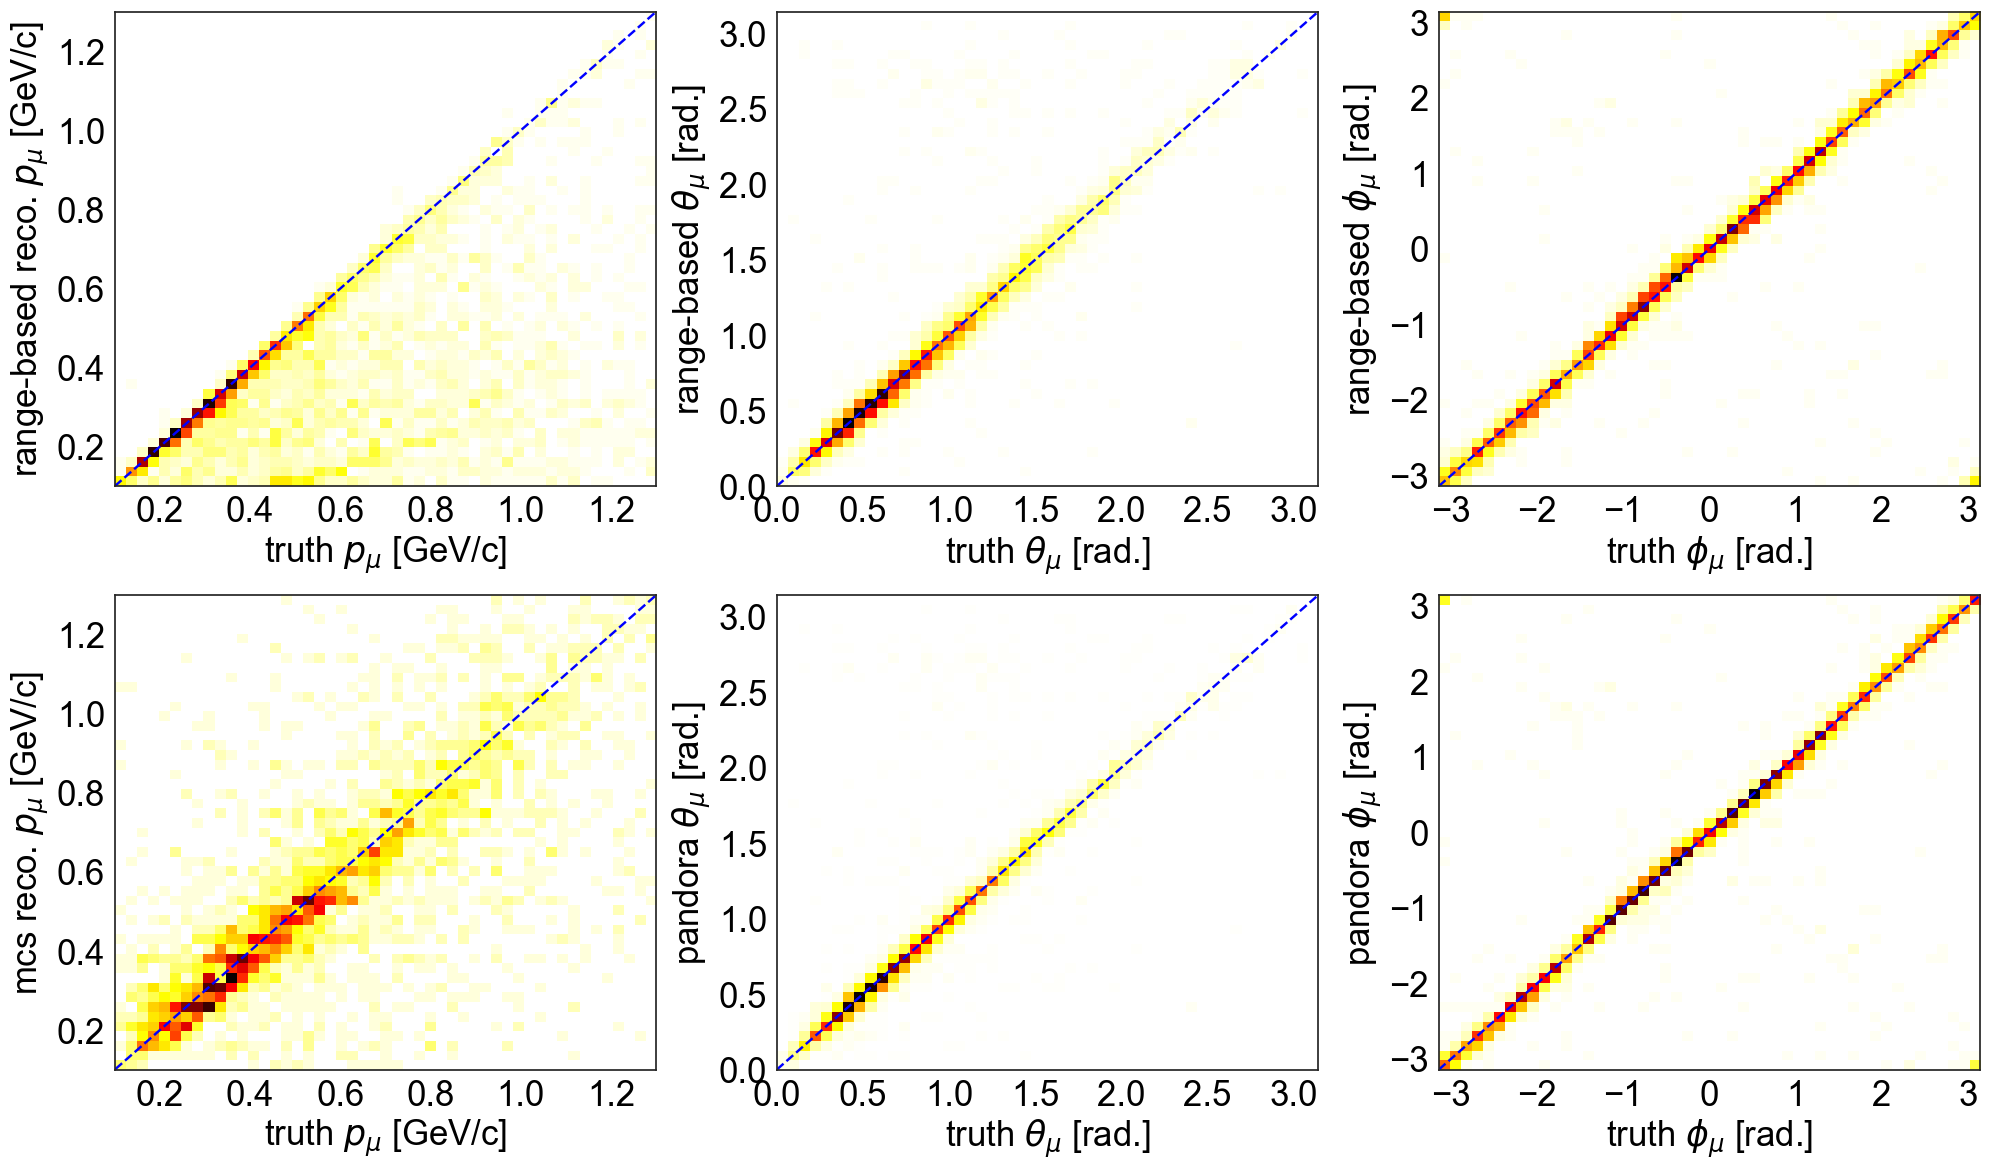

In [39]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,3,1)        
plot_2d_hist(sam['truth_Pmu'],sam['reco_Pmu'],bins=linspace(0.1,1.3,50)
             ,xlabel=r'truth '+r'$p_\mu$ [GeV/c]',ylabel=r'range-based reco. '+r'$p_\mu$ [GeV/c]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,2)
bins=linspace(0,np.pi,50)
plot_2d_hist(sam['truth_Pmu_theta'],sam['reco_Pmu_theta'],bins=bins
             ,xlabel=r'truth '+r'$\theta_\mu$ [rad.]',ylabel=r'range-based '+r'$\theta_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,3)
bins=linspace(-np.pi,np.pi,50)
plot_2d_hist(sam['truth_Pmu_phi'],sam['reco_Pmu_phi'],bins=bins
             ,xlabel=r'truth '+r'$\phi_\mu$ [rad.]',ylabel=r'range-based '+r'$\phi_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')


ax=fig.add_subplot(2,3,4)        
plot_2d_hist(sam['truth_Pmu'],sam['reco_Pmu_mcs'],bins=linspace(0.1,1.3,50)
             ,xlabel=r'truth '+r'$p_\mu$ [GeV/c]',ylabel=r'mcs reco. '+r'$p_\mu$ [GeV/c]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,5)
bins=linspace(0,np.pi,50)
plot_2d_hist(sam['truth_Pmu_theta'],sam['reco_Pmu_pandora_theta'],bins=bins
             ,xlabel=r'truth '+r'$\theta_\mu$ [rad.]',ylabel=r'pandora '+r'$\theta_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(2,3,6)
bins=linspace(-np.pi,np.pi,50)
plot_2d_hist(sam['truth_Pmu_phi'],sam['reco_Pmu_pandora_phi'],bins=bins
             ,xlabel=r'truth '+r'$\phi_\mu$ [rad.]',ylabel=r'pandora '+r'$\phi_\mu$ [rad.]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

plt.tight_layout()

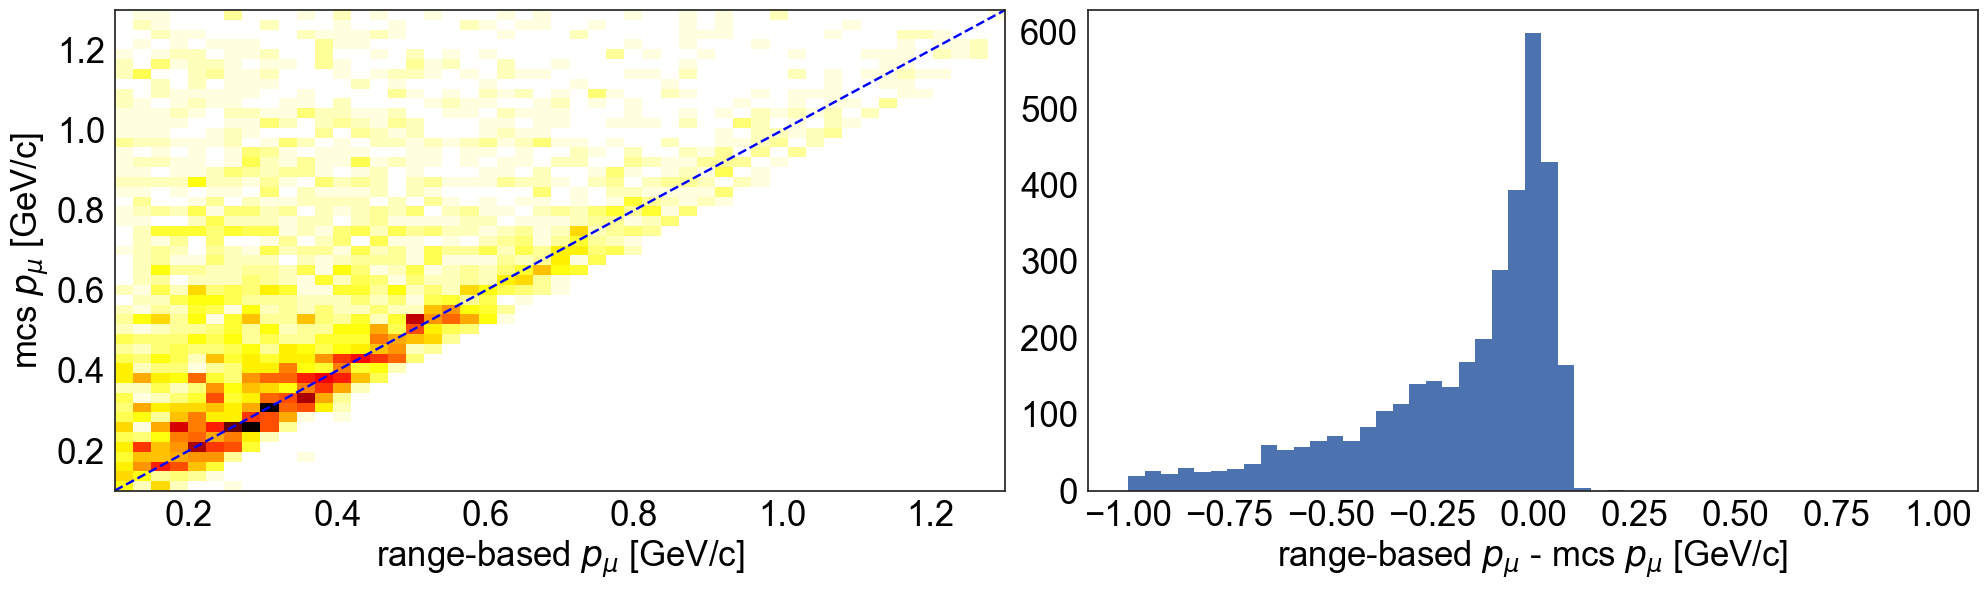

In [45]:
fig=plt.figure(figsize=(20,6))
ax=fig.add_subplot(1,2,1)
bins=linspace(0.1,1.3,50)
plot_2d_hist(sam['reco_Pmu'],sam['reco_Pmu_mcs'],bins=bins
             ,xlabel=r'range-based $p_\mu$ [GeV/c]',ylabel=r'mcs $p_\mu$ [GeV/c]',ax=ax);
plt.plot([np.min(bins),np.max(bins)],[np.min(bins),np.max(bins)],'--',color='blue')

ax=fig.add_subplot(1,2,2)
bins=linspace(0.1,1.3,50)
plt.hist(sam['reco_Pmu']-sam['reco_Pmu_mcs'],bins=linspace(-1,1,50));
set_axes(ax,r'range-based $p_\mu$ - mcs $p_\mu$ [GeV/c]')
plt.tight_layout()